In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('experiment_20241204_230204/training_log.csv')

# Convert Episode to int
df['Episode'] = pd.to_numeric(df['Episode'], errors='coerce')

# Convert all other columns to float
float_columns = ['Train_Reward', 'Val_Reward', 'Epsilon', 'Learning_Rate']
for col in float_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

rewards = pd.to_numeric(df['Train_Reward'])

max_reward = rewards.max()
print(f"Maximum reward: {max_reward}")

Maximum reward: 946.2999938502908


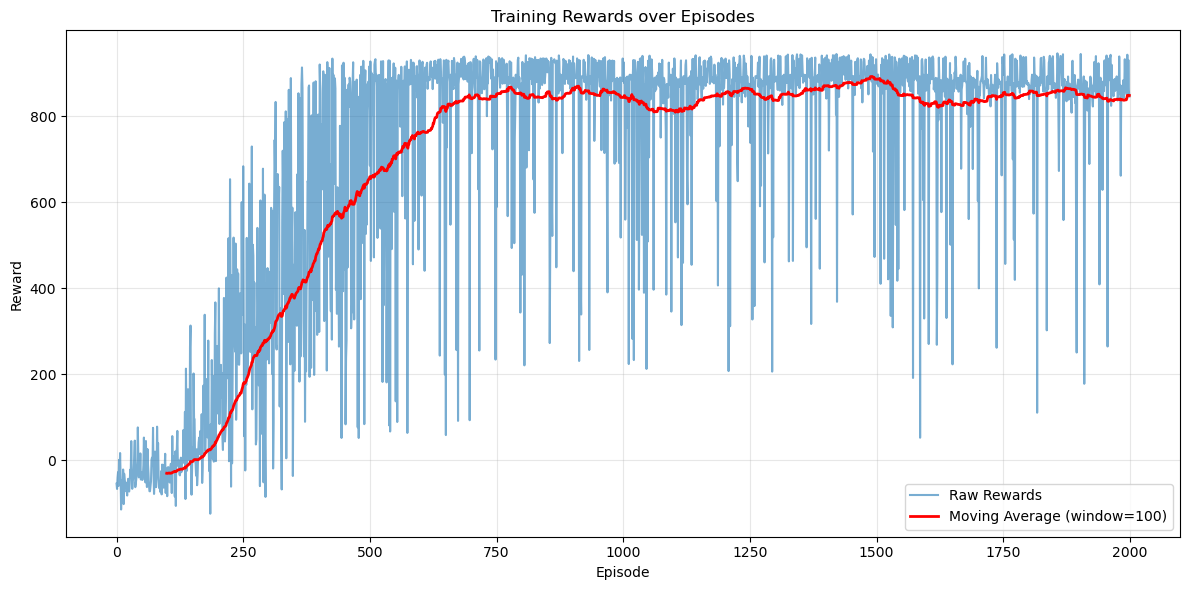

Initial Reward: -54.10
Final Reward: 845.85
Maximum Reward: 946.30
Average Reward: 704.44


In [3]:
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df['Episode'], df['Train_Reward'], alpha=0.6, label='Raw Rewards')

# Add a smoothed line using rolling average
window_size = 100
rolling_mean = df['Train_Reward'].rolling(window=window_size).mean()
plt.plot(df['Episode'], rolling_mean, 'r', linewidth=2, label=f'Moving Average (window={window_size})')

# Customize the plot
plt.title('Training Rewards over Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.grid(True, alpha=0.3)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Initial Reward: {df['Train_Reward'].iloc[0]:.2f}")
print(f"Final Reward: {df['Train_Reward'].iloc[-1]:.2f}")
print(f"Maximum Reward: {df['Train_Reward'].max():.2f}")
print(f"Average Reward: {df['Train_Reward'].mean():.2f}")